In [67]:
import pandas as pd
import numpy as np

In [10]:
data =pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)

In [11]:
print(data.head())

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [12]:
print(data.tail())

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [14]:
print(data.shape)

(200, 4)


### Features:

- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

### Target:
-Sales: sales of a single product in a given market (in thousands of widgets)

In [15]:
#bseaborn is a python library for Statistical Data visualization made on top of matplotlib
import seaborn as sns

%matplotlib inline

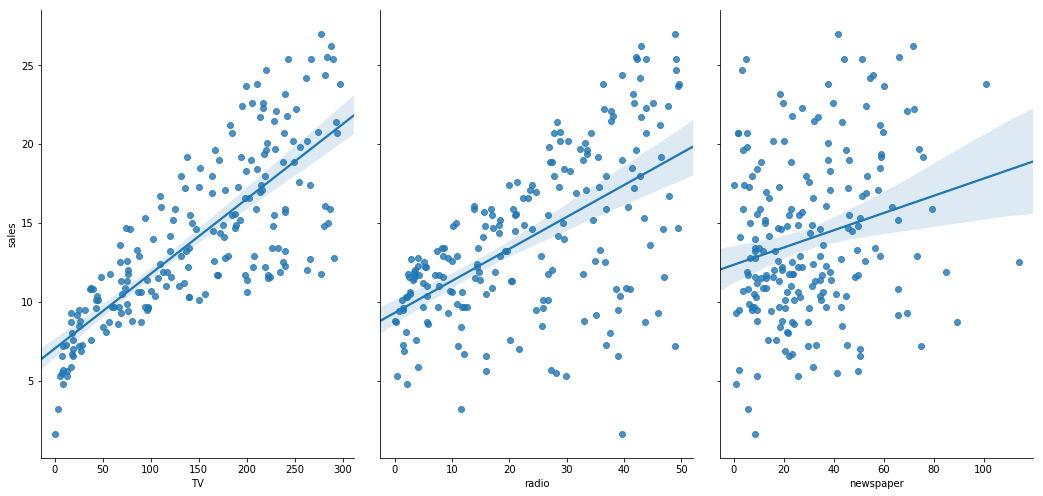

In [19]:
# visualize the relationship between the features and the response using scatterplots(pairs)
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.7,kind='reg')

### Linear_Regression

In [50]:
feature_cols=['TV','radio','newspaper']
X=data[feature_cols] #this is equivaent to X=data[['Tv','radio','newspaper']]
print(X.head())


      TV  radio  newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4


In [22]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [58]:
y=data['sales']
print(y.head())

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64


In [52]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [53]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [54]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [56]:
zipped=list(zip(feature_cols,linreg.coef_))
print(zipped)

[('TV', 0.04656456787415028), ('radio', 0.17915812245088836), ('newspaper', 0.0034504647111804347)]


### Making Predictions

In [61]:
y_pred=linreg.predict(X_test)
print(y_pred)

[21.70910292 16.41055243  7.60955058 17.80769552 18.6146359  23.83573998
 16.32488681 13.43225536  9.17173403 17.333853   14.44479482  9.83511973
 17.18797614 16.73086831 15.05529391 15.61434433 12.42541574 17.17716376
 11.08827566 18.00537501  9.28438889 12.98458458  8.79950614 10.42382499
 11.3846456  14.98082512  9.78853268 19.39643187 18.18099936 17.12807566
 21.54670213 14.69809481 16.24641438 12.32114579 19.92422501 15.32498602
 13.88726522 10.03162255 20.93105915  7.44936831  3.64695761  7.22020178
  5.9962782  18.43381853  8.39408045 14.08371047 15.02195699 20.35836418
 20.57036347 19.60636679]


### Error Calculation

In [64]:
from sklearn import metrics
#mean absolute error
print(metrics.mean_absolute_error(y_test,y_pred))

1.0668917082595213


In [71]:
#mean squared error
print(metrics.mean_squared_error(y_test,y_pred))

1.9730456202283384


In [72]:
#root mean squared error
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


1.4046514230328955


### Feature Selection

As we saw in the pair plots of the seaborn that 'newspaper' feature is hardly contributing to sales,so we must eliminate that feature and calculate the error

In [76]:
feature_cols=['TV','radio']
X=data[feature_cols]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)

#root mean squared error
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))



1.3879034699382888


- As root mean squared error has decreased by eliminating the 'newspaper' feature.So,'newspaper' feature is reduntant and can be removed